
# **<span style='color:green'>Naive Bayes Classifier - Breast Cancer Prediction</span>**

# **Libraries**


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# **<u>Requirement (1):</U> Dataset & Preprocessing**

**This Data From Kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Breast Cancer Wisconsin (Diagnostic) Data Set .csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### **Finding the null values in our data for each column**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### **Check if the data is clean with no <u>NULL</u> Values or not**

In [ ]:
if data.isna().sum().sum() == 0:
  print("There is no missing values in our data")
else:
  print(f"The Total Number of missing data is: {data.isna().sum().sum()}")

The Total Number of missing data is: 569


### **Preprocessing Phase**

In [ ]:
#dropping id because it's an unnecessary feature, dropping Unnamed: 32 because it contains no values
data.drop(['id'], axis=1, inplace = True)

In [ ]:
# Label Encoding For the Diagnosis Column to convert it into numeric values to be able to deal with it
# Malignant --> 1
# Benign    --> 0
labels = data["diagnosis"]
label_encoder = preprocessing.LabelEncoder()
data["diagnosis"] = label_encoder.fit_transform(data["diagnosis"])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **<u>Requirements (2~6):</u> Basic EDA**

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. <br>
EDA is used for seeing what the data can tell us before the modeling task.

### **<u>Requirement (2):</u> Data Type Classification (Quantitative & Categorical)**

In [ ]:
# List All Columns
data_columns = list(data.columns)

# Find only quantitative data
quantitative_data = list(data.select_dtypes(include=['int64', 'float64']).columns)


# Function to print and classify our data into catgorical and classification
def data_type_classification(data_columns, quantitative_data):
  categ_data = []
  quant_data = []
  for idx in range(len(data_columns)):
    if data_columns[idx] in quantitative_data:
      quant_data.append(data_columns[idx])
    else:
      categ_data.append(data_columns[idx])

  print("Categrical Data:")
  print("----------------")
  for idx in range(len(categ_data)):
    print(f"{idx+1}. {categ_data[idx]}")
  print()
  print("Quantitative Data:")
  print("------------------")
  for idx in range(len(quant_data)):
    print(f"{idx+1}. {quant_data[idx]}")



data_type_classification(data_columns, quantitative_data)

Categrical Data:
----------------

Quantitative Data:
------------------
1. diagnosis
2. radius_mean
3. texture_mean
4. perimeter_mean
5. area_mean
6. smoothness_mean
7. compactness_mean
8. concavity_mean
9. concave points_mean
10. symmetry_mean
11. fractal_dimension_mean
12. radius_se
13. texture_se
14. perimeter_se
15. area_se
16. smoothness_se
17. compactness_se
18. concavity_se
19. concave points_se
20. symmetry_se
21. fractal_dimension_se
22. radius_worst
23. texture_worst
24. perimeter_worst
25. area_worst
26. smoothness_worst
27. compactness_worst
28. concavity_worst
29. concave points_worst
30. symmetry_worst
31. fractal_dimension_worst
32. Unnamed: 32


### **Choose the target feature and the independent features in our data**

Number of Benign:  357
Number of Malignant :  212


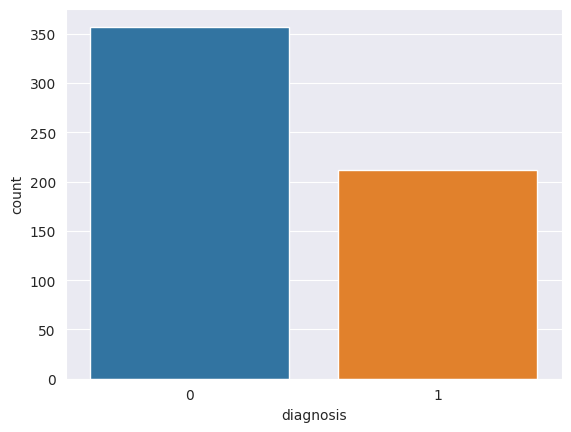

In [ ]:
# We applied a histogram to know how the data is distributed
# We found that Malignant samples are more than Benign Samples which means that the dataset is litle unbalanced
ax = sns.countplot(data=data, x=data['diagnosis'])
B, M = data['diagnosis'].value_counts()
print('Number of Benign: ', B)
print('Number of Malignant : ', M)

<Axes: >

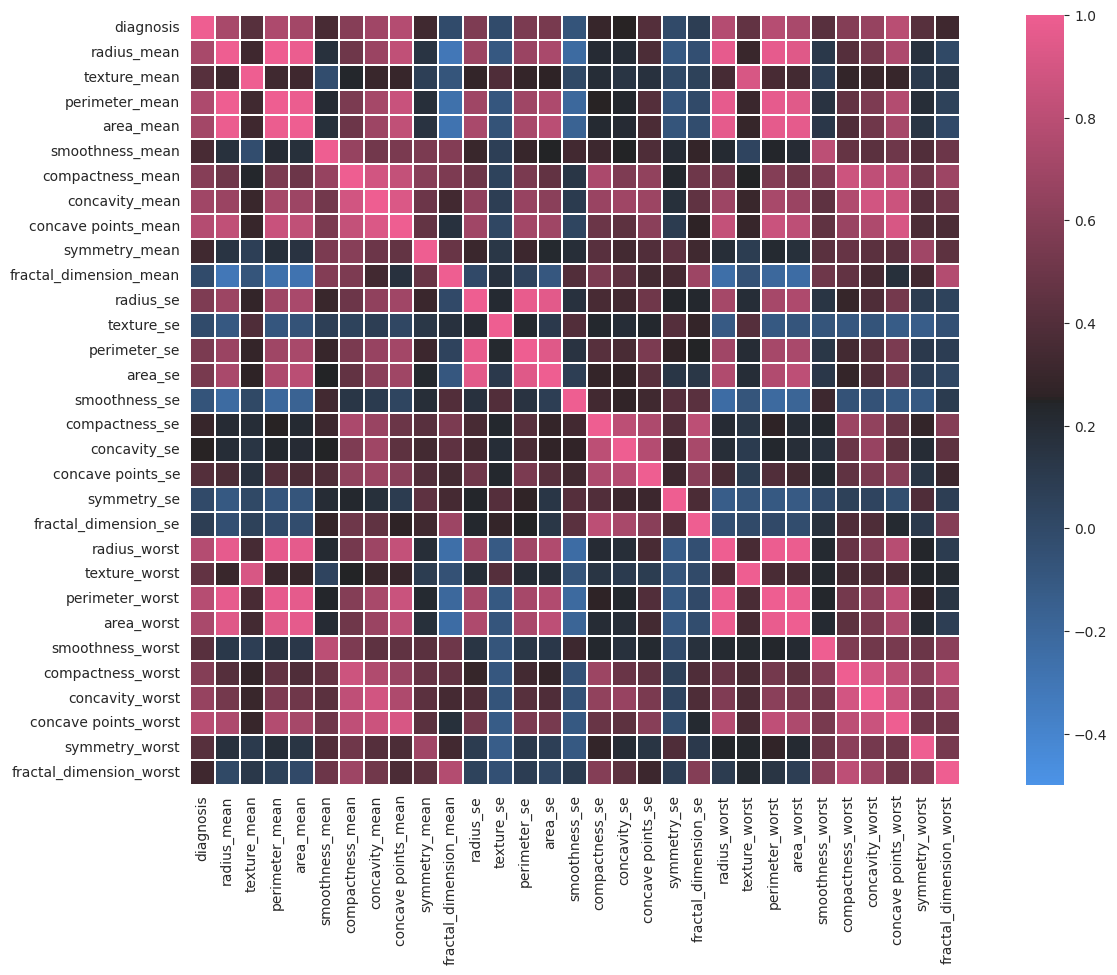

In [ ]:
# We want to check if the features are independent to be able to be used in the Naive Bayes Classification Algorithm
# We will get the correlation score for each feature
# We Get the correlation by pearson correlation technique
plt.figure(figsize=(17,10))
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60, center='dark', as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-0.5, cmap=cmap, square=True, linewidths=0.2)

In [ ]:
# Choosing the needed features that will help us in the decision
# data_y = data['diagnosis']
data = data[["diagnosis", "radius_mean", "smoothness_mean", "texture_mean", "compactness_mean", "concavity_mean", "symmetry_mean",  "fractal_dimension_mean"]]
data.head()

,diagnosis,radius_mean,smoothness_mean,texture_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,0.11840,10.38,0.27760,0.3001,0.2419,0.07871
1,1,20.57,0.08474,17.77,0.07864,0.0869,0.1812,0.05667
2,1,19.69,0.10960,21.25,0.15990,0.1974,0.2069,0.05999
3,1,11.42,0.14250,20.38,0.28390,0.2414,0.2597,0.09744
4,1,20.29,0.10030,14.34,0.13280,0.1980,0.1809,0.05883


### **<u>Requirement (3):</u> See Outliers & Removing**

In [ ]:
def plot_box(data):
  j=0
  plt.subplots(2,4,figsize=(17,10))
  for col in data.columns:
    plt.subplot(2, 4, j+1)
    sns.boxplot(data=data,x=data[col])
    j+=1
  plt.show()

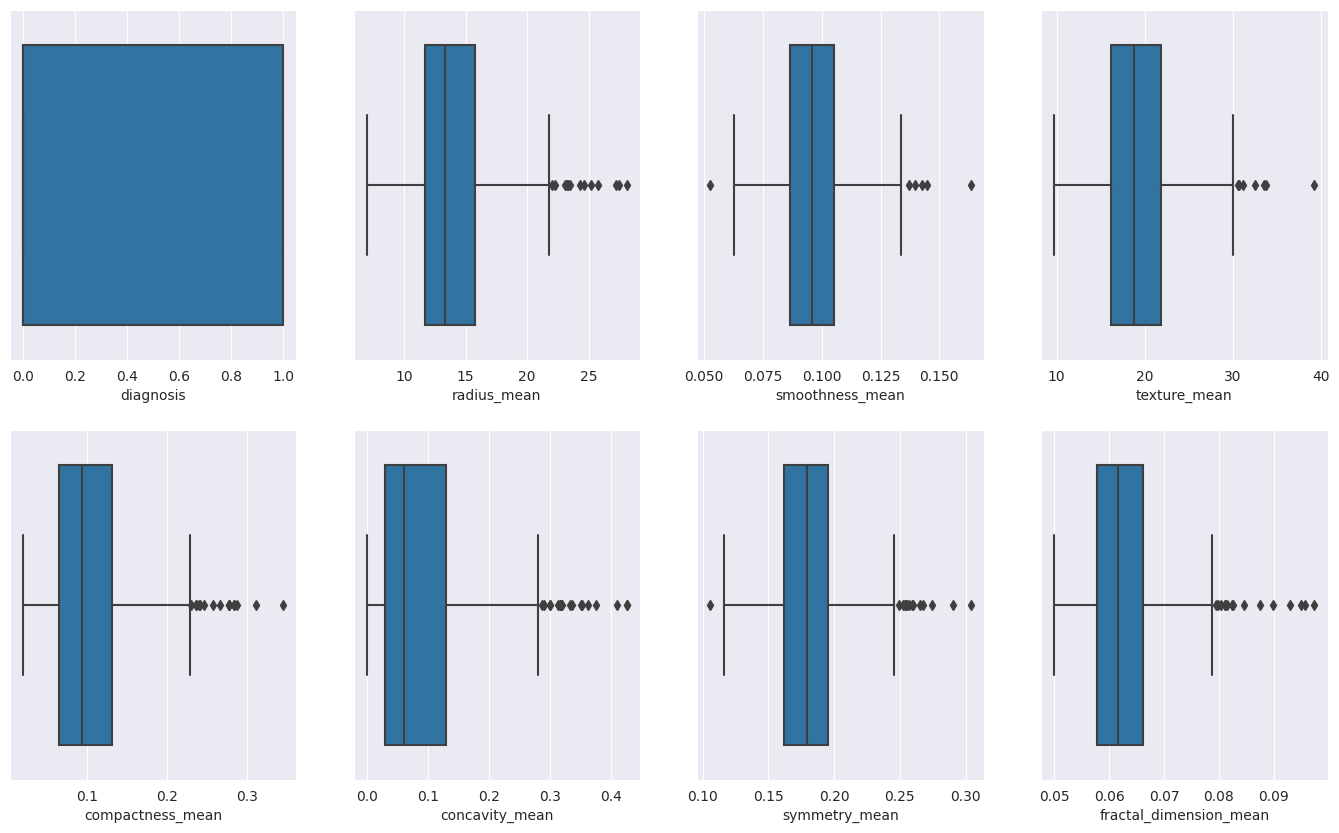

In [ ]:
# Show the oultier in each indpendent feature in our data
plot_box(data)

#### **Removing Outliers Phase**

In [ ]:
# removing the outliers of the data if its normally  distributed by z score method
def remove_outliers_zscore(data, columns, threshold=2):
   data_no_outliers = data.copy()
   total_outliers_removed_by_z_score = 0

   for column in columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        data_no_outliers = data_no_outliers[z_scores < threshold]
        rem = len(data) - len(data_no_outliers)
        total_outliers_removed_by_z_score += rem
        print(f"outliers removerd in{column} = {rem} ")
   print(f"total_outliers_removied_by_z_score = {total_outliers_removed_by_z_score}" )
   return data_no_outliers

columns_to_remove_outliers_by_z = ['diagnosis','radius_mean', 'smoothness_mean','texture_mean','symmetry_mean' ,'fractal_dimension_mean']
data_no_outliers_z = remove_outliers_zscore(data, columns_to_remove_outliers_by_z, threshold=2)
selected_z = ['diagnosis','radius_mean', 'smoothness_mean','texture_mean','symmetry_mean' ,'fractal_dimension_mean']
new_z = data_no_outliers_z[selected_z]

outliers removerd indiagnosis = 0 
outliers removerd inradius_mean = 20 
outliers removerd insmoothness_mean = 38 
outliers removerd intexture_mean = 63 
outliers removerd insymmetry_mean = 83 
outliers removerd infractal_dimension_mean = 97 
total_outliers_removied_by_z_score = 301


<ipython-input-162-5534b36e4744>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_outliers = data_no_outliers[z_scores < threshold]


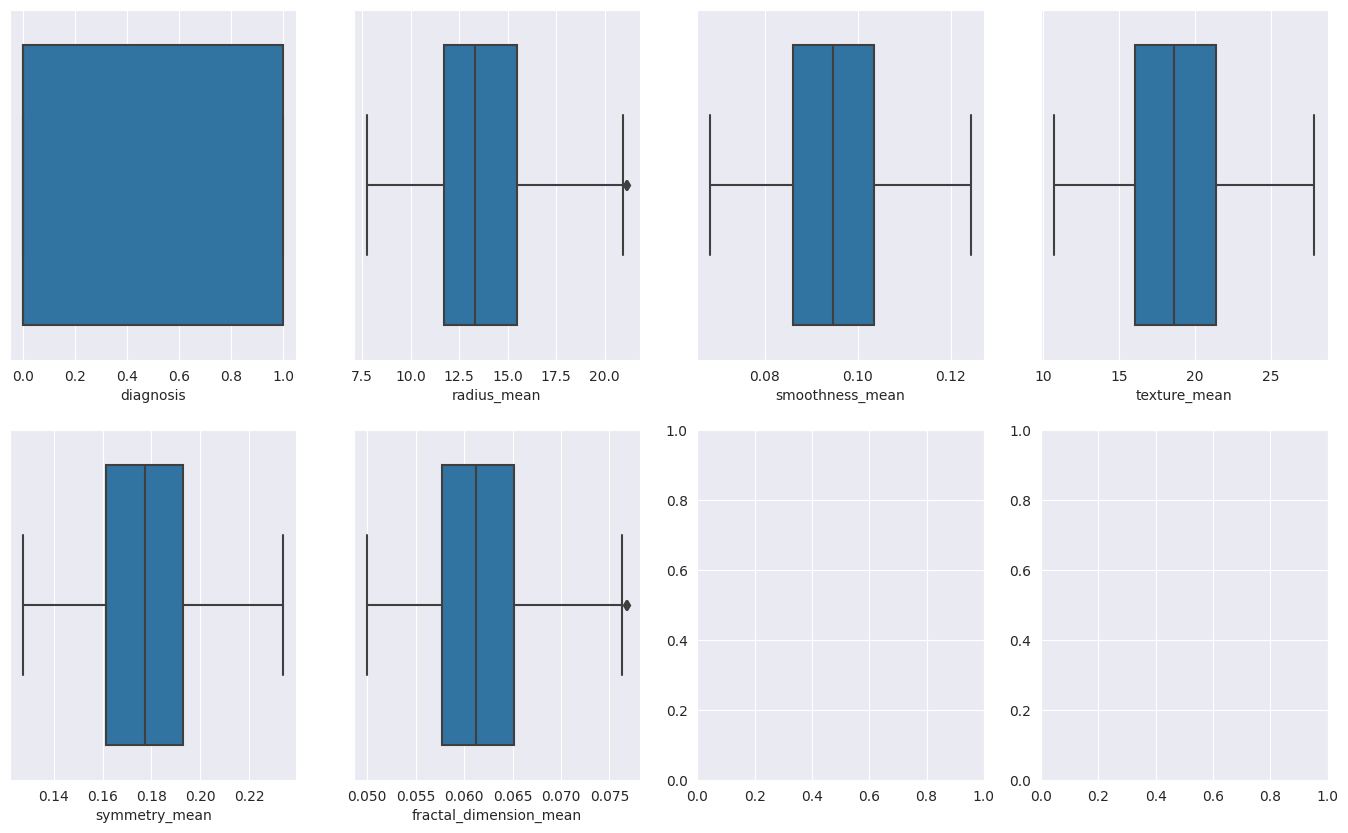

In [ ]:
plot_box(new_z)

In [ ]:
# removing the outliers of the data if its  not normally  distributed by  IQR
def remove_outliers_iqr(data, columns, multiplier=1.5):
    data_no_outliers = data.copy()
    total_outliers_removed_by_IQR = 0


    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]
        ren = len(data) - len(data_no_outliers)
        total_outliers_removed_by_IQR += ren
        print(f"outlires removerd in{column} = {ren} ")

    print(f"total_outliers_removied_by_IQR = {total_outliers_removed_by_IQR}" )
    return data_no_outliers
columns_to_remove_outliers = ['compactness_mean', 'concavity_mean']
data_no_outliers_iqr = remove_outliers_iqr(data, columns_to_remove_outliers, multiplier=1.5)
selected_iqr =  ['compactness_mean', 'concavity_mean']
new_iqr = data_no_outliers_iqr[selected_iqr]

outlires removerd incompactness_mean = 16 
outlires removerd inconcavity_mean = 24 
total_outliers_removied_by_IQR = 40


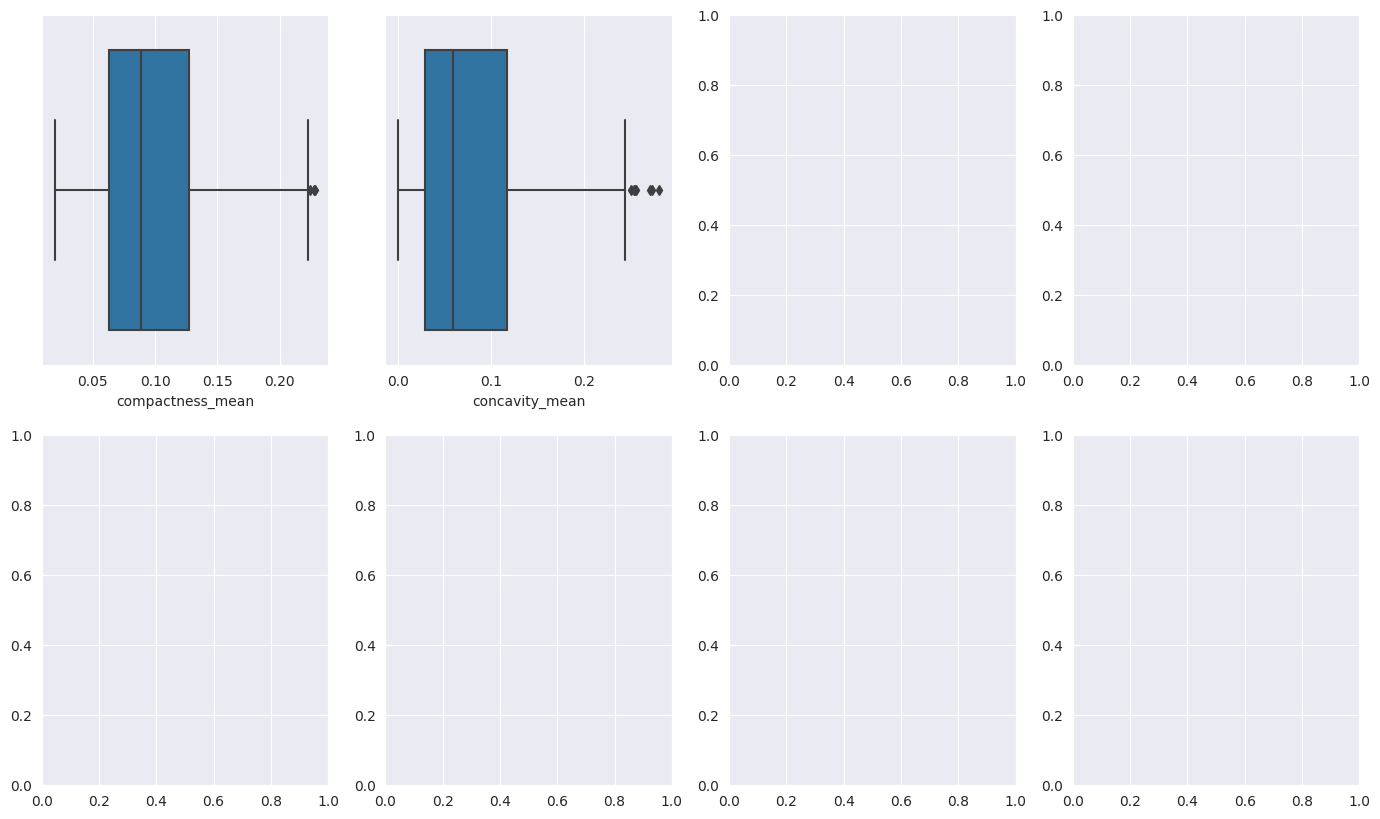

In [ ]:
plot_box(new_iqr)

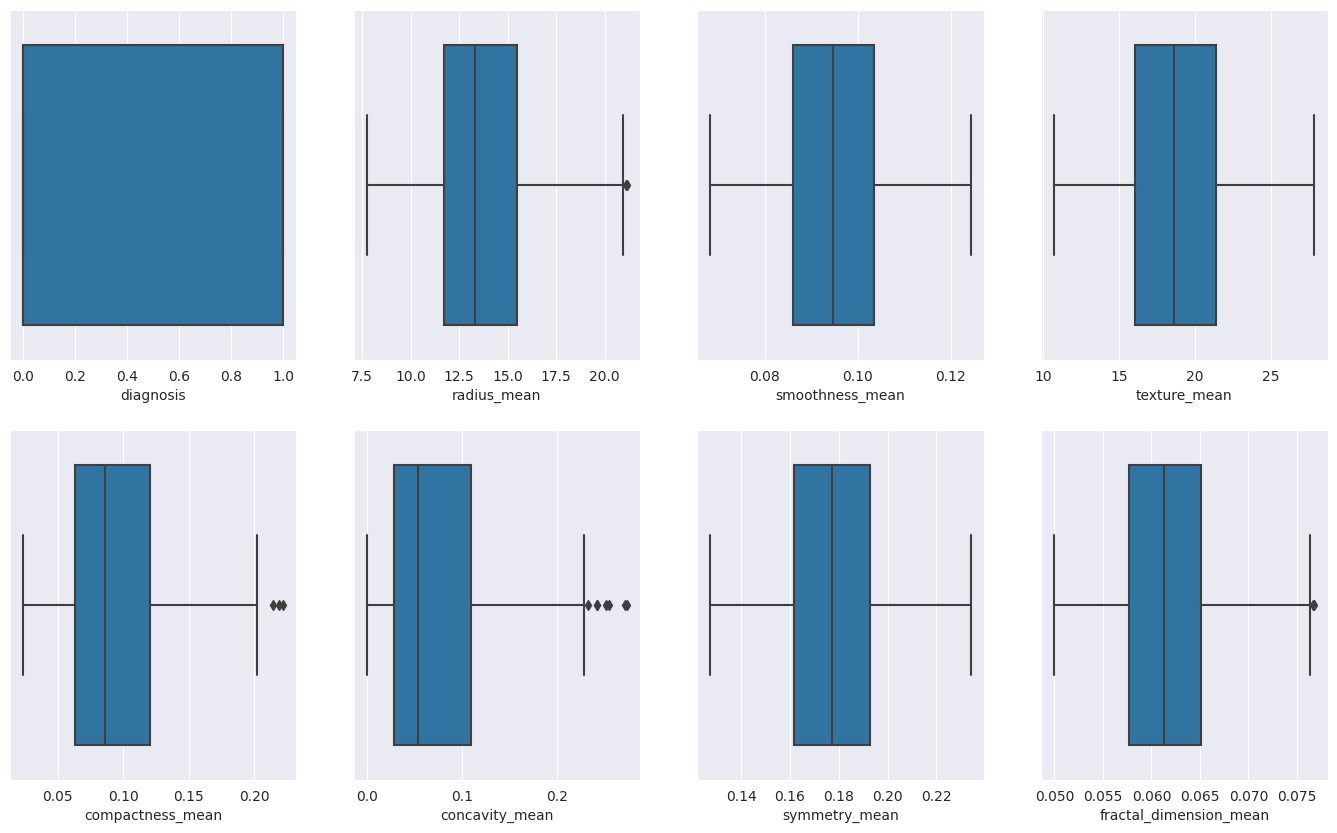

In [ ]:
merged_data = new_z.join(new_iqr)
desired_columns = ['diagnosis','radius_mean', 'smoothness_mean', 'texture_mean', 'compactness_mean',
                  'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Reorder the columns
merged_data = merged_data[desired_columns]
plot_box(merged_data)

In [ ]:
merged_data['diagnosis']

1      1
2      1
4      1
6      1
7      1
      ..
557    0
558    0
559    0
560    0
563    1
Name: diagnosis, Length: 472, dtype: int64

In [ ]:
data=merged_data

### **<u>Requirement (4):</u> Data Description & Analysis**

In [ ]:
data.describe().style.background_gradient()

,diagnosis,radius_mean,smoothness_mean,texture_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,472.000000,472.000000,472.000000,472.000000,469.000000,469.000000,472.000000,472.000000
mean,0.341102,13.874042,0.095011,18.808517,0.094692,0.074179,0.177505,0.061772
std,0.474582,2.983191,0.011904,3.646990,0.039993,0.059716,0.021526,0.005334
min,0.000000,7.729000,0.068280,10.720000,0.023440,0.000000,0.127400,0.049960
25%,0.000000,11.710000,0.086038,16.070000,0.062880,0.028530,0.161575,0.057682
50%,0.000000,13.290000,0.094755,18.595000,0.085750,0.053970,0.177200,0.061275
75%,1.000000,15.460000,0.103525,21.387500,0.120600,0.109700,0.192925,0.065162
max,1.000000,21.160000,0.124300,27.880000,0.222500,0.273300,0.234100,0.076820


In [ ]:
data.median(numeric_only=True)

diagnosis                  0.000000
radius_mean               13.290000
smoothness_mean            0.094755
texture_mean              18.595000
compactness_mean           0.085750
concavity_mean             0.053970
symmetry_mean              0.177200
fractal_dimension_mean     0.061275
dtype: float64

In [ ]:
# Calculate measures of central tendency
mean = np.mean(data)
median = np.median(data)


# Calculate measures of dispersion
range_val = np.ptp(data)
variance = np.var(data)
std_dev = np.std(data)

# Print the calculated statistics
print("Mean:", mean)
print("Median:", median)
print("Range:", range_val)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Mean: diagnosis                  0.341102
radius_mean               13.874042
smoothness_mean            0.095011
texture_mean              18.808517
compactness_mean           0.094692
concavity_mean             0.074179
symmetry_mean              0.177505
fractal_dimension_mean     0.061772
dtype: float64
Median: nan
Range: diagnosis                  1.00000
radius_mean               13.43100
smoothness_mean            0.05602
texture_mean              17.16000
compactness_mean               NaN
concavity_mean                 NaN
symmetry_mean              0.10670
fractal_dimension_mean     0.02686
dtype: float64
Variance: diagnosis                  0.224751
radius_mean                8.880571
smoothness_mean            0.000141
texture_mean              13.272359
compactness_mean           0.001596
concavity_mean             0.003558
symmetry_mean              0.000462
fractal_dimension_mean     0.000028
dtype: float64
Standard Deviation: diagnosis                 0.474079
radius_me

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:278: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  umr_maximum(a, axis, None, out, keepdims),
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:279: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  umr_minimum(a, axis, None, None, keepdims),


### **<u>Requirement (5):</u> Features Standardization**

In [ ]:
data['diagnosis'].unique

<bound method Series.unique of 1      1
2      1
4      1
6      1
7      1
      ..
557    0
558    0
559    0
560    0
563    1
Name: diagnosis, Length: 472, dtype: int64>

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'smoothness_mean', 'texture_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean'],
      dtype='object')

In [ ]:
data = merged_data

In [ ]:
data.head()

,diagnosis,radius_mean,smoothness_mean,texture_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
1,1,20.57,0.08474,17.77,0.07864,0.08690,0.1812,0.05667
2,1,19.69,0.10960,21.25,0.15990,0.19740,0.2069,0.05999
4,1,20.29,0.10030,14.34,0.13280,0.19800,0.1809,0.05883
6,1,18.25,0.09463,19.98,0.10900,0.11270,0.1794,0.05742
7,1,13.71,0.11890,20.83,0.16450,0.09366,0.2196,0.07451


In [ ]:
new_data = list()
for column in data.columns[1:]:
  data[column] = (data[column] - data[column].mean()) / (data[column].std())
  new_data.append(data[column])

In [ ]:
df = pd.DataFrame(new_data)
df = df.transpose()

In [ ]:
df['diagnosis']=merged_data['diagnosis']
df.head()

,radius_mean,smoothness_mean,texture_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,diagnosis
1,2.244563,-0.862848,-0.284760,-0.401378,0.213017,0.171647,-0.956464,1
2,1.949576,1.225601,0.669451,1.630467,2.063431,1.365542,-0.334011,1
4,2.150703,0.444323,-1.225262,0.952852,2.073479,0.157711,-0.551495,1
6,1.466872,-0.032005,0.321219,0.357751,0.645059,0.088028,-0.815850,1
7,-0.054989,2.006879,0.554288,1.745487,0.326219,1.955521,2.388285,1


In [ ]:
df.shape

(472, 8)

In [ ]:
df.describe().style.background_gradient()

,radius_mean,smoothness_mean,texture_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,diagnosis
count,472.000000,472.000000,472.000000,469.000000,469.000000,472.000000,472.000000,472.000000
mean,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.341102
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.474582
min,-2.059889,-2.245626,-2.217861,-1.781612,-1.242196,-2.327633,-2.214495,0.000000
25%,-0.725412,-0.753847,-0.750898,-0.795445,-0.764437,-0.740033,-0.766635,0.000000
50%,-0.195778,-0.021504,-0.058546,-0.223598,-0.338423,-0.014173,-0.093092,0.000000
75%,0.531631,0.715250,0.707154,0.647800,0.594822,0.716333,0.635760,1.000000
max,2.442337,2.460524,2.487389,3.195733,3.334440,2.629119,2.821377,1.000000


### **<u>Requirement (6):</u> Splitting data**

In [ ]:
df.head()

,radius_mean,smoothness_mean,texture_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,diagnosis
1,2.244563,-0.862848,-0.284760,-0.401378,0.213017,0.171647,-0.956464,1
2,1.949576,1.225601,0.669451,1.630467,2.063431,1.365542,-0.334011,1
4,2.150703,0.444323,-1.225262,0.952852,2.073479,0.157711,-0.551495,1
6,1.466872,-0.032005,0.321219,0.357751,0.645059,0.088028,-0.815850,1
7,-0.054989,2.006879,0.554288,1.745487,0.326219,1.955521,2.388285,1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=41)

X_test_acc = test.iloc[:,:-1].values
Y_test_acc = test.iloc[:,-1].values

# **<u>Requirement (7):</u> Analyzing Training Features**

### **7.1. Plotting Histogram for each feature After Removing Outliers**

<Axes: xlabel='texture_mean', ylabel='Count'>

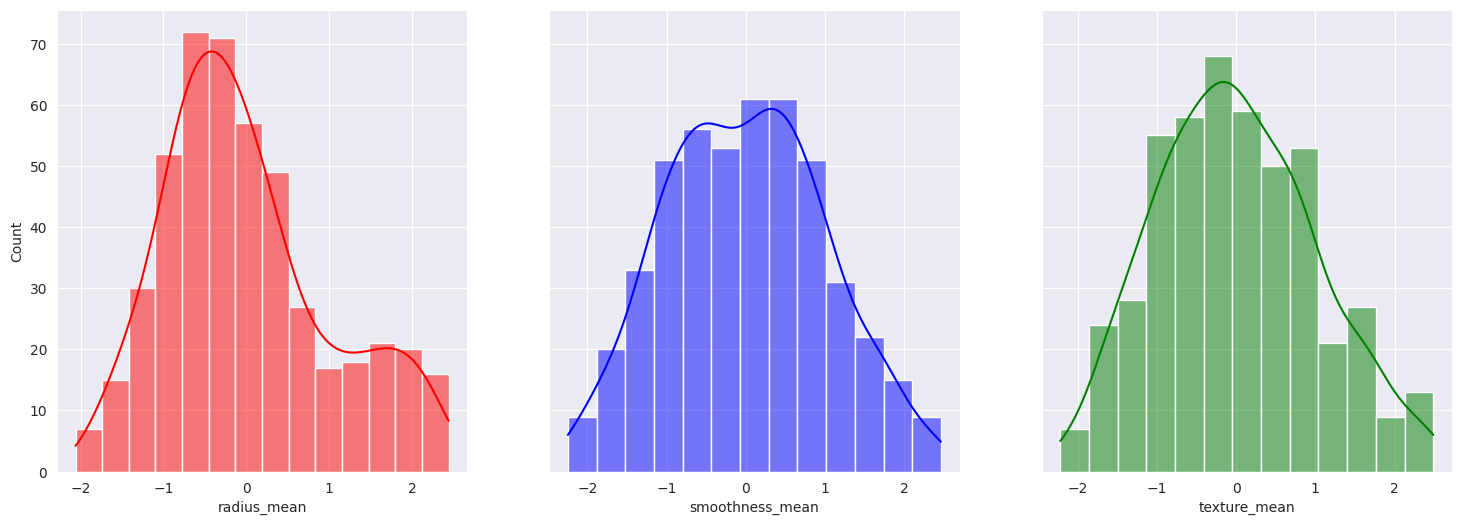

In [ ]:
# Plotting the Histograms of the selected features - Part (1)
# -----------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="radius_mean",                 kde=True, color='r')
sns.histplot(df, ax=axes[1], x="smoothness_mean",             kde=True, color='b')
sns.histplot(df, ax=axes[2], x="texture_mean",                kde=True, color='g')

<Axes: xlabel='concavity_mean', ylabel='Count'>

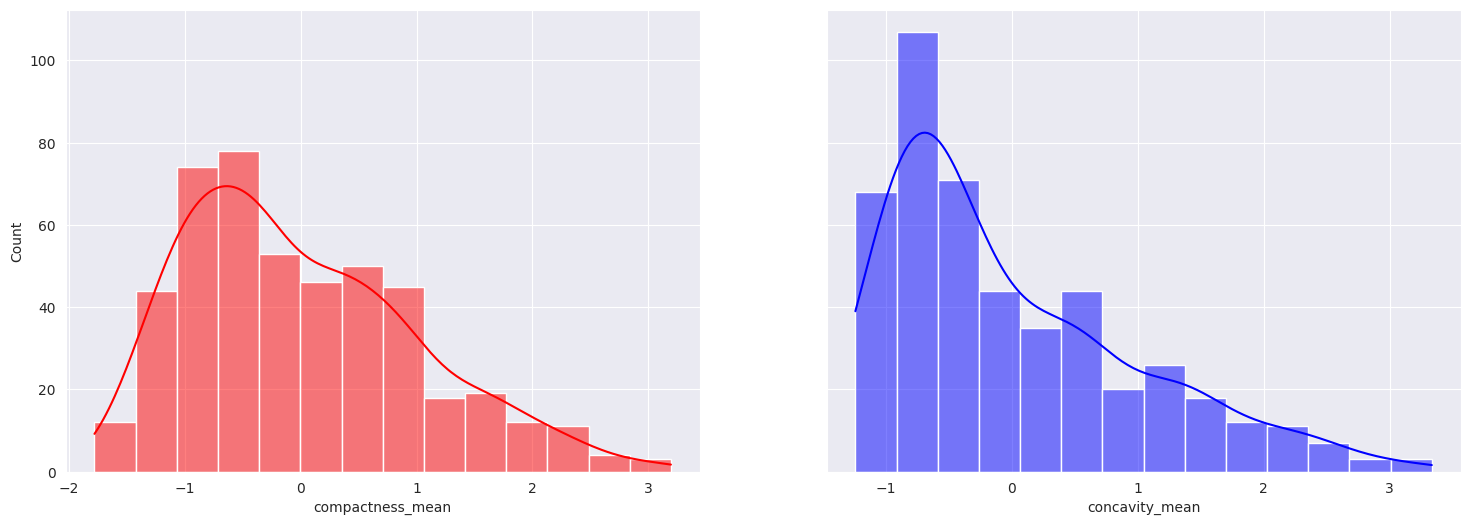

In [ ]:
# Plotting the Histograms of the selected features - Part (2)
# -----------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="compactness_mean",                kde=True, color='r')
sns.histplot(df, ax=axes[1], x="concavity_mean",                  kde=True, color='b')

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

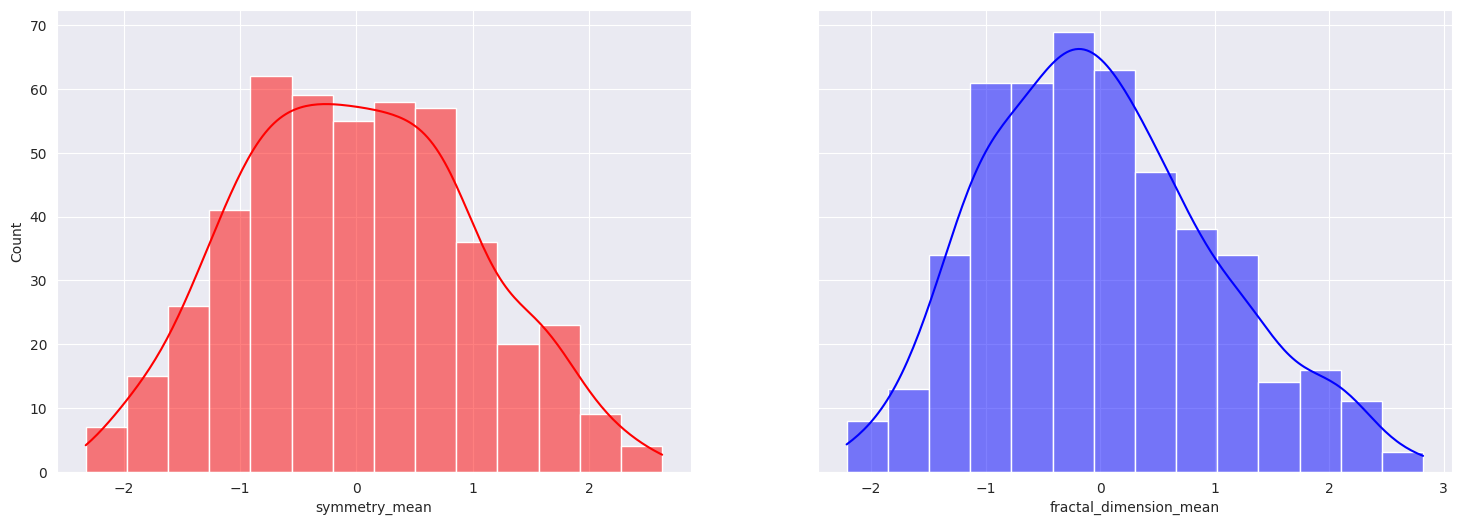

In [ ]:
# Plotting the Histograms of the selected features - Part (3)
# -----------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="symmetry_mean",               kde=True, color='r')
sns.histplot(df, ax=axes[1], x="fractal_dimension_mean",      kde=True, color='b')

### **7.2. Comment on the type of each distribution (Gaussian, exponential, uniform, etc)**

#### **From the previous <u>Histograms</u> we found the following:**
**1- radius_mean:** <br>
The distribution appears to have two peaks, but it does not strictly follow a bimodal distribution. Rather, it appears to have two overlapped normal distributions, which is reasonable given that the diagnosis is either malignant or benign, it can still be considered approximately normally distributed.<br>

**2- smoothness_mean:**                                                     <br>
Is normally distrubuted                                                     <br>

**3- texture_mean:**                                                        <br>
Slightly positive(right)-skewed with a longer tail on the right side.       <br>

**4- compactness_mean:**                                                    <br>
Moderately positive(right)-skewed with a longer tail on the right side.     <br>

**5- concavity_mean:**                                                      <br>
Positive(right)-skewed with a longer tail on the right side.                <br>

**6- symmetry_mean:**                                                       <br>
Approximately normally distrubuted.                                         <br>

**7- fractal_dimension_mean:**                                              <br>
Slightly positive(right)-skewed with a longer tail on the right side

### **<span style='color:red'>7.3. Using <u>Kolmogorov-Smirnov Test  to statistically test if the feature is normally distributed or not</u></span>**

In [ ]:
from scipy.stats import kstest

for col in df.columns[:-1]:
  stat, p=kstest(df[col], 'norm')

  print(f"{col}:")
  print(f"KS test statistics {stat:.4f}:")
  print(f"KS test statistics {stat:.4f}:")

  alpha=0.05
  if p > alpha:
    print("Result : Normal (Gauissian) distributed data")
  else:
    print("Result : non-Normal (non-Gauissian) distributed data")

print()



radius_mean:
KS test statistics 0.0982:
KS test statistics 0.0982:
Result : non-Normal (non-Gauissian) distributed data
smoothness_mean:
KS test statistics 0.0397:
KS test statistics 0.0397:
Result : Normal (Gauissian) distributed data
texture_mean:
KS test statistics 0.0313:
KS test statistics 0.0313:
Result : Normal (Gauissian) distributed data
compactness_mean:
KS test statistics nan:
KS test statistics nan:
Result : non-Normal (non-Gauissian) distributed data
concavity_mean:
KS test statistics nan:
KS test statistics nan:
Result : non-Normal (non-Gauissian) distributed data
symmetry_mean:
KS test statistics 0.0366:
KS test statistics 0.0366:
Result : Normal (Gauissian) distributed data
fractal_dimension_mean:
KS test statistics 0.0478:
KS test statistics 0.0478:
Result : Normal (Gauissian) distributed data



### **7.4. Ploting the conditional distributions of each feature on each target class (label).**

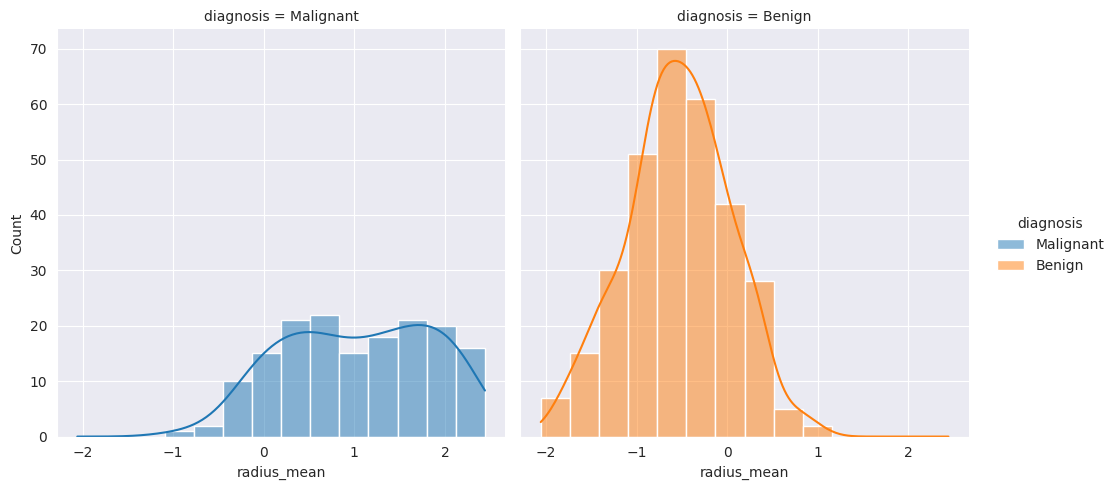

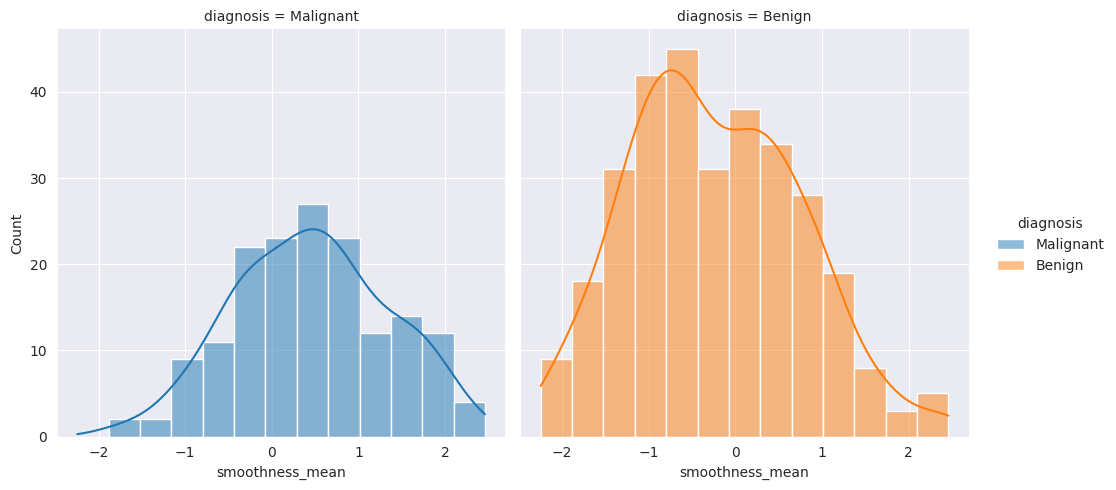

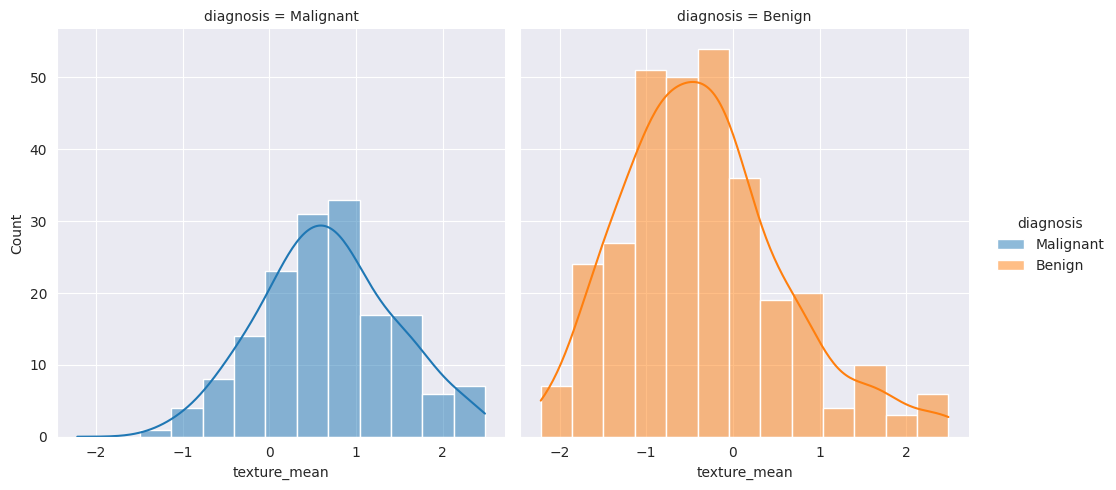

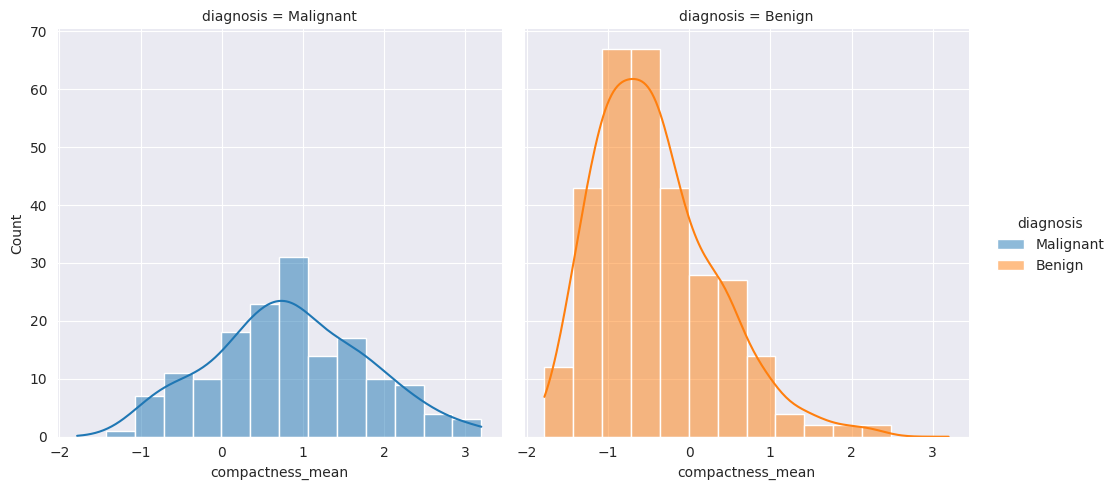

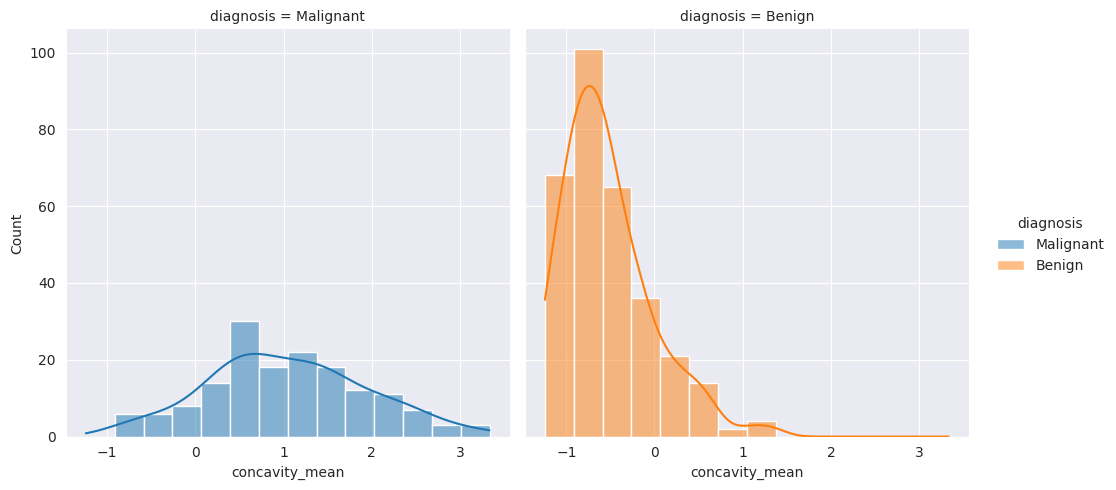

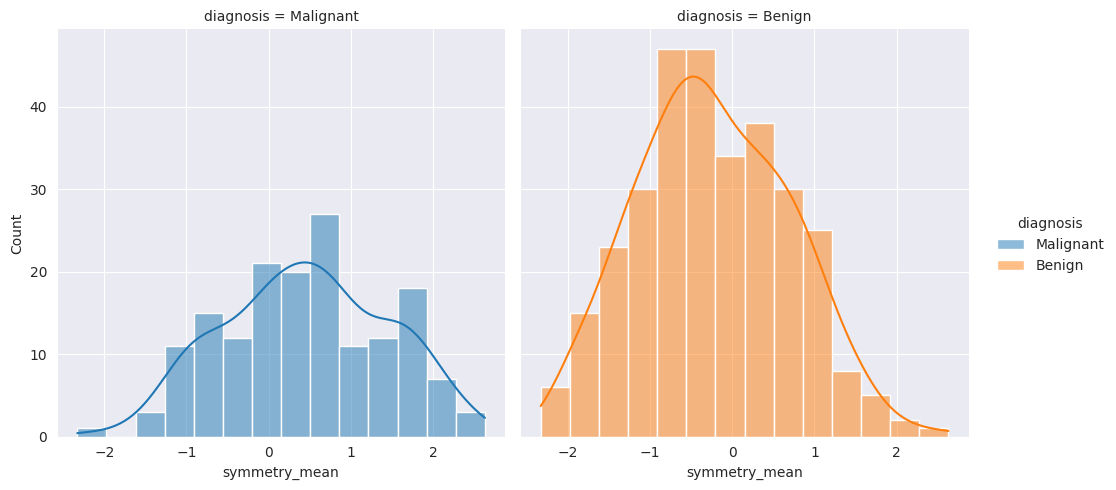

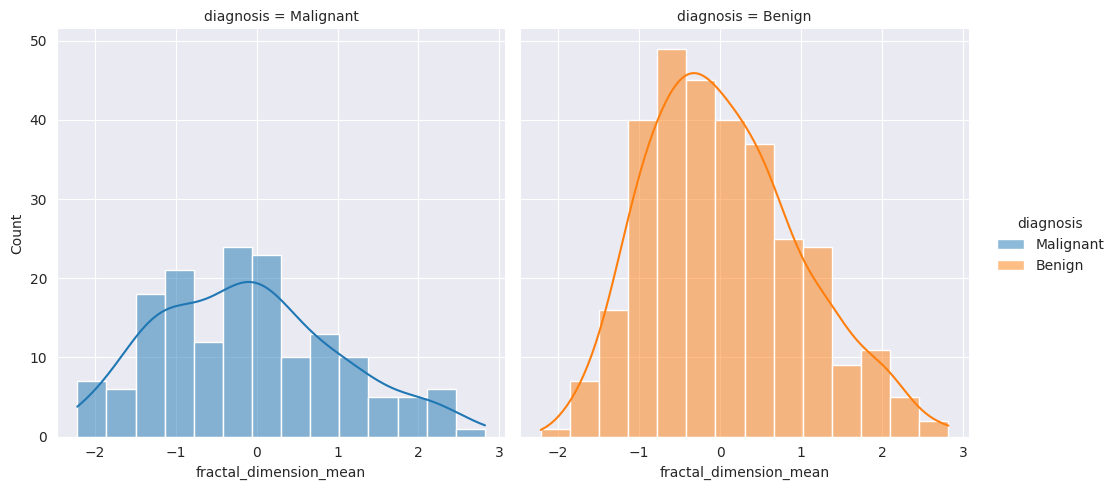

In [ ]:
labels = labels.replace({"M": "Malignant", "B": "Benign"})

sns.displot(data=data, x=data["radius_mean"],           col=labels, hue=labels, kde=True)
sns.displot(data=df, x=df["smoothness_mean"],           col=labels, hue=labels, kde=True)
sns.displot(data=df, x=df["texture_mean"],              col=labels, hue=labels, kde=True)
sns.displot(data=df, x=df["compactness_mean"],          col=labels, hue=labels, kde=True)
sns.displot(data=df, x=df["concavity_mean"],            col=labels, hue=labels, kde=True)
sns.displot(data=df, x=df["symmetry_mean"],             col=labels, hue=labels, kde=True)
sns.displot(data=df, x=df["fractal_dimension_mean"],    col=labels, hue=labels, kde=True)

# **<u>Requirement (8):</u> Naive Bayes Functions Implementation**

### **8.1. Naive Bayes Implementation From Scratch - Manual Approach**

In [ ]:
model_comparison={}

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior



def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y



def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

### **8.2. Use the trained NB model to predict the classification of the test data.**

In [ ]:
Y_pred_acc = naive_bayes_gaussian(train, X=X_test_acc, Y="diagnosis")

### **Check The Approach Validation**

In [ ]:
#function to check Errors
def check_Errors(ytest,ypred):
  from sklearn import metrics

  accuracy=metrics.accuracy_score(ytest,ypred)
  precision=metrics.precision_score(ytest,ypred)
  f1_score=metrics.f1_score(ytest,ypred)
  recall=metrics.recall_score(ytest,ypred)

  print(f"Accuracy score of model is: {100*accuracy:.3} %")
  print(f"precision score of model is: {100*precision:.3} %")
  print(f"f1_score score of model is: {100*f1_score:.3} %")
  print(f"recall score of model is: {100*recall:.3} %")

In [ ]:
#function to get classification report
def get_report(ytest,ypred):
  from sklearn.metrics import classification_report
  print(classification_report(ytest,ypred))

In [ ]:
#function to get confusion matrix
def get_confm(ytest,ypred):
  from sklearn.metrics import confusion_matrix
  conf_m=confusion_matrix(ytest,ypred)
  sns.heatmap(conf_m,annot=True,cmap='plasma')
  plt.title("Confusion Matrix",fontsize=14)

In [ ]:
#func to check model
def check_model(ytest,ypred):
   get_report(ytest,ypred)
   print("______________________________________________________________________________")
   print(" ")
   get_confm(ytest,ypred)
   print(" ")
   check_Errors(ytest,ypred)
   print(" ")
   print("______________________________________________________________________________")
   print("")

### **8.3. Calculate the model accuracy**

$$ Recall = \frac{Tp}{Tp + FN} $$


**HINT!!!** <br>
*We should to focus on Recall Score, as it's recommended in the sensitive data*

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.94      0.85      0.89        34

    accuracy                           0.93        95
   macro avg       0.93      0.91      0.92        95
weighted avg       0.93      0.93      0.93        95

______________________________________________________________________________
 
 
Accuracy score of model is: 92.6 %
precision score of model is: 93.5 %
f1_score score of model is: 89.2 %
recall score of model is: 85.3 %
 
______________________________________________________________________________



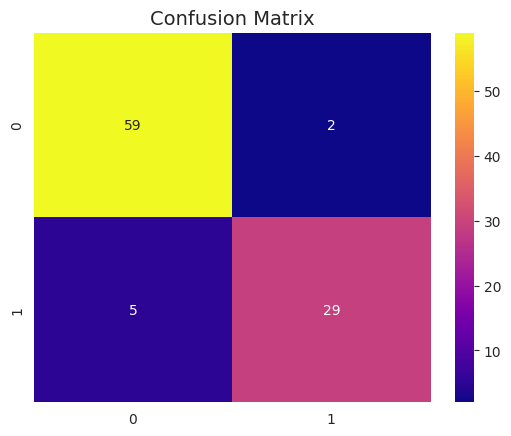

In [ ]:
# sklearn model
check_model(Y_test_acc,Y_pred_acc)

In [ ]:
import sklearn.metrics as metrics
accuracy=metrics.accuracy_score(Y_test_acc,Y_pred_acc)
precision=metrics.precision_score(Y_test_acc,Y_pred_acc)
f1_score=metrics.f1_score(Y_test_acc,Y_pred_acc)
recall=metrics.recall_score(Y_test_acc,Y_pred_acc)
model_comparison['NB']=[accuracy,f1_score,precision,recall]

In [ ]:
x = df.drop(['diagnosis'],axis=1)

y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=.2, random_state=41)

In [ ]:
X_train = X_train.dropna()  # Drop rows with missing values
Y_train = Y_train.loc[X_train.index]  # Update the target variable accordingly

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()

nb_model.fit(X_train,Y_train)

y_pred=nb_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.94      0.85      0.89        34

    accuracy                           0.93        95
   macro avg       0.93      0.91      0.92        95
weighted avg       0.93      0.93      0.93        95

______________________________________________________________________________
 
 
Accuracy score of model is: 92.6 %
precision score of model is: 93.5 %
f1_score score of model is: 89.2 %
recall score of model is: 85.3 %
 
______________________________________________________________________________



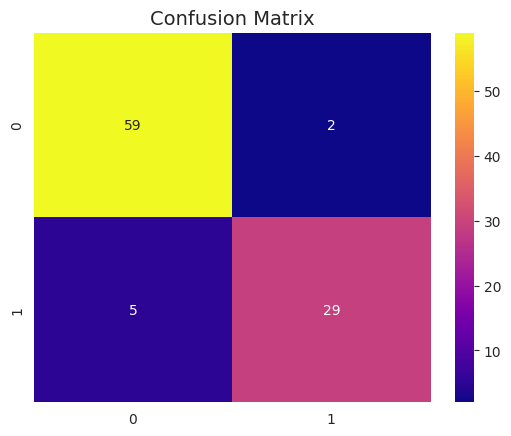

In [ ]:
check_model(y_test,y_pred)

In [ ]:
accuracy=metrics.accuracy_score(Y_test_acc,Y_pred_acc)
precision=metrics.precision_score(Y_test_acc,Y_pred_acc)
f1_score=metrics.f1_score(Y_test_acc,Y_pred_acc)
recall=metrics.recall_score(Y_test_acc,Y_pred_acc)
model_comparison['NB_sklearn']=[accuracy,f1_score,precision,recall]

### **8.4. Compare your results to the case of using the NB classifier from standard Python packages**

In [ ]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','precision','recall']
Model_com_df=Model_com_df.sort_values(by='recall',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,precision,recall
NB,92.63%,89.23%,93.55%,85.29%
NB_sklearn,92.63%,89.23%,93.55%,85.29%
